In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Taller 10
## Problema 2
En el movimiento de tiro parabólico, se considera que la fuerza debida a la resistencia del aire es lo suficientemente pequeña como para ser despreciada. En el taller 1, se encontró que al tomar a la fuerza anterior como $\vec{f} = -b\vec{r}$, las ecuaciones de movimiento en el plano $xz$ ($x$ el eje horizontal y $z$ el eje vertical) eran:
$$ x = \frac{mv_{_x0}}{b}(1-e^{-bt/m}) $$
$$ z = \left(\frac{m^2g}{b^2} + \frac{mv_{_x0}}{b}\right)(1-e^{-bt/m}) - \frac{mg}{b}t $$
donde $m$ es la masa del proyectil y $v_{_z0}$, $v_{_z0}$ son las componentes horizontal y vertical de la velocidad inicial $v_0$, realice 5 gráficas en el _notebook_ adjunto para distintos valores de velocidad inicial $v_0 = |\vec{v_0}|$ y ángulo de
lanzamiento $\theta$.

Compare con el movimiento de tiro parabólico y explique cómo influye la resistencia del aire en el movimiento.

In [2]:
# Constantes #
v = 100
th = 0
g = 9.8

# Funciones para $x$ y $x$ #
def x(time, velocity_0=v, theta=th, mass=5, resistance=3):
    return (mass*velocity_0*np.cos(theta)/resistance)*(1-np.exp(-resistance*time/mass))

def z(time, velocity_0=v, theta=th, mass=5, resistance=3):
    return ((np.power(mass,2)*g)/(np.power(resistance,2))+(mass*velocity_0*np.sin(theta))/resistance)*(1-np.exp(-resistance*time/mass))-(mass*g*time/resistance)

# Generar valores para el tiempo #
t = np.linspace(0,30,1000)

<ipython-input-46-04fd055d7ba8>:15: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set_xlim(xmin=0, xmax=xaxis[yaxis>=0][-1])    #
<ipython-input-46-04fd055d7ba8>:16: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim(ymin=0, ymax=np.amax(yaxis))


[Text(0, 0.5, '$y$'), Text(0, 0.5, '$y$')]

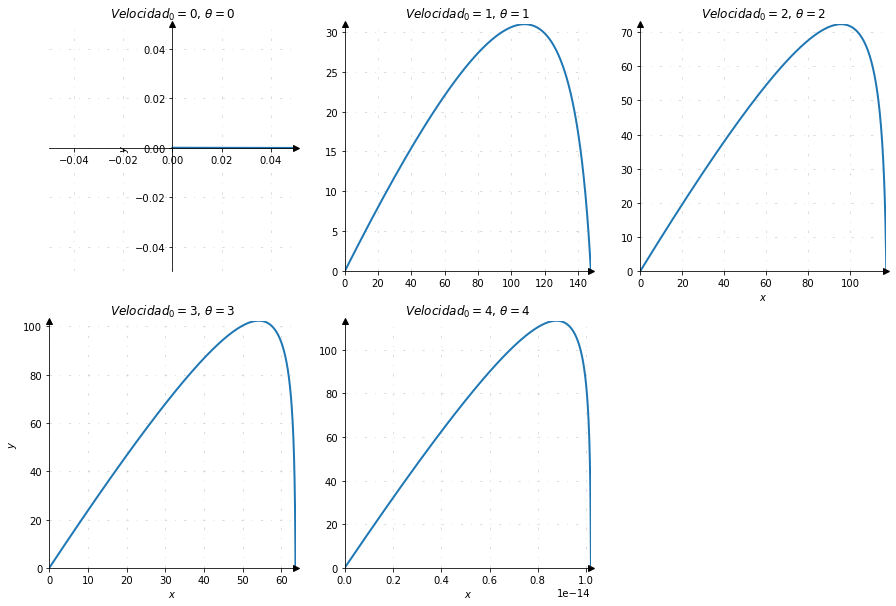

In [46]:
# Generar graficas #
fig, axs = plt.subplots(2,3, figsize=(15,10))

# Especificaciones para las graficas #
angles = np.linspace(0,90,5)*np.pi/180
for ax,i in zip(axs.flat, range(6)):
    if i == 5:
        ax.axis('off')
    else:
        xaxis = x(t, theta=angles[i])
        yaxis = z(t, theta=angles[i])
        ax.plot(xaxis,yaxis, lw=2)
        ax.set_title(f'$Velocidad_0={i}$, $\\theta={i}$')
        ax.grid(linestyle=(0, (3, 10, 1, 10)), linewidth=0.8, color='lightgray')
        ax.set_xlim(xmin=0, xmax=xaxis[yaxis>=0][-1])    #
        ax.set_ylim(ymin=0, ymax=np.amax(yaxis))
        
        # Move the left and bottom spines to x = 0 and y = 0, respectively.
        ax.spines[["left", "bottom"]].set_position(("data", 0))
        # Hide the top and right spines.
        ax.spines[["top", "right"]].set_visible(False)
        
        ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
        ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

        
axs[0,2].set_xlabel('$x$')
plt.setp(axs[-1,:], xlabel='$x$')
plt.setp(axs[:,0], ylabel='$y$')

In [45]:
uno = x(t, theta=np.pi/8)
dos = z(t, theta=np.pi/8)

np.amax(dos)

30.927252397155605

In [42]:
yaxis>=0

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,